In [1]:
### IMPORT LIBRARIES ###

# IMPORT SCIENTIFIC LIBRARIES
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib widget
%matplotlib inline
import pandas as pd
import seaborn as sns
from scipy.optimize import curve_fit

# IMPORT CUSTOM LIBRARIES
from IN8_read_data import read_IN8scan, read_IN8scan_specJun24, gen_data_df_specJun24
from functions import *

from alias import *

In [2]:
### IMPORT OF MEASUREMENTS DATA ###
data = gen_data_df_specJun24('./data/scan_database.tsv', './data/rawdata/')
sumup_col = ['name', 'notes', 'date', 'time', 'QM', 'E', 'steps']
display(data[sumup_col])

Scan 50337 not found
Scan 50338 not found
Scan 50339 not found
Scan 50340 not found
Scan 50341 not found
Scan 50342 not found
Scan 50343 not found


,name,notes,date,time,QM,E,steps
Nscan,,,,,,,
50304,sc a5,STOP,03-Jun-24,15:08:38,4.904906,-0.0134,A5= 0.1000
50305,sc a5,Scan a 2theta fisso per allineare l'analizzato...,03-Jun-24,15:08:49,4.904906,-0.0134,A5= 0.2000
50306,sc a3,Allineamento slit nel pentolone a3 => 10,03-Jun-24,15:19:27,4.904922,-0.0134,A3= 2.0000
50307,sc ei 69.68 dei 0.5 np 15 mn 2000,vediamo lo scan in energia,03-Jun-24,15:32:02,4.843829,-3.5464,EI= 0.5000
50308,sc ei 69.68 dei 0.5 np 15 mn 2000,rivediamo lo scan in ei,03-Jun-24,15:41:02,4.842048,-3.5464,EI= 0.5000
50309,sc ei 69.68 dei 0.5 np 15 mn 2000,"Facciamo una risoluzione al volo, andrà rifatta",03-Jun-24,15:54:15,0.707931,-3.5464,EI= 0.5000
50310,bs d1t 30,mettiamo la slit d1t a 20 mm,03-Jun-24,16:49:50,0.701002,-0.0134,D1T= -2.0000
50311,bs d1l 30,mettiamo la slit d1l a 13 mm,03-Jun-24,17:00:31,0.701002,-0.0134,D1L= -2.0000
50312,empty .7 300K 5000,NaN,03-Jun-24,17:49:32,0.700555,-15.0154,EN= 0.5000


# Tempi

| Monitor | Q | tempo [ore-minuti] | tempo [ore] | flusso a M1 
|---------|---|--------------------|--------------|------------
| 5000    | .7| 1:33               | 1.55         | 65
| 5000    | .9| 2:00               | 2.00         | 64
| 5000    |1.1| 2:33               | 2.55         | 63
| 5000    |1.5| 3:00               | 3.00         | 63

# Risoluzione con Vanadio

Gaussian fit results:
x0 = 0.02 +/- 0.02 meV
FWHM = 2.08 +/- 0.03 meV


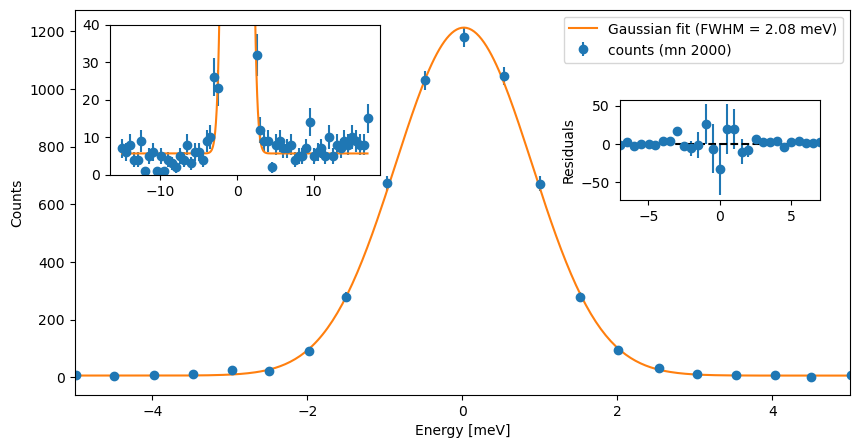

In [3]:
plt.figure(figsize=(10,5))
S = data.loc[Nvana[.7]].data
plt.errorbar(S.EN, S.CNTS, yerr=S.dCNTS, fmt='o', label='counts (mn 2000)')

gauss = lambda x, A, x0, FWHM, c: A*np.exp(-(x-x0)**2/(2*(FWHM/2.355)**2)) + c

popt, pcov = curve_fit(gauss, S.EN[(S.EN>-5) & (S.EN<5)], S.CNTS[(S.EN>-5) & (S.EN<5)], sigma=S.dCNTS[(S.EN>-5) & (S.EN<5)])
X = np.linspace(S.EN.min(), S.EN.max(), 1000)
plt.plot(X, gauss(X, *popt), label='Gaussian fit (FWHM = {:.2f} meV)'.format(popt[2]))

plt.legend()
plt.xlabel('Energy [meV]')
plt.ylabel('Counts')
plt.xlim(-5,5)

# add above as an inset figure
plt.axes([0.16, 0.55, 0.27, 0.3])
plt.errorbar(S.EN, S.CNTS, yerr=S.dCNTS, fmt='o')
plt.plot(X, gauss(X, *popt))
plt.ylim(0,40)

# and add residuals
plt.axes([0.67, 0.5, 0.2, 0.2])
plt.errorbar(S.EN, S.CNTS - gauss(S.EN, *popt), yerr=S.dCNTS, fmt='o')
plt.axhline(0, color='k', ls='--')
plt.ylabel('Residuals')
plt.xlim(-7,7)

# print of the fit results
print('Gaussian fit results:')
print('x0 = {:.2f} +/- {:.2f} meV'.format(popt[1], np.sqrt(pcov[1,1])))
print('FWHM = {:.2f} +/- {:.2f} meV'.format(popt[2], np.sqrt(pcov[2,2])))


### Primo test
Guardo come è invece la risoluzione del primo test che avevamo fatto. Risulta identica!

Gaussian fit results:
x0 = 69.67 +/- 0.02 meV (working at Ef = 69.7 meV)
FWHM = 2.07 +/- 0.03 meV


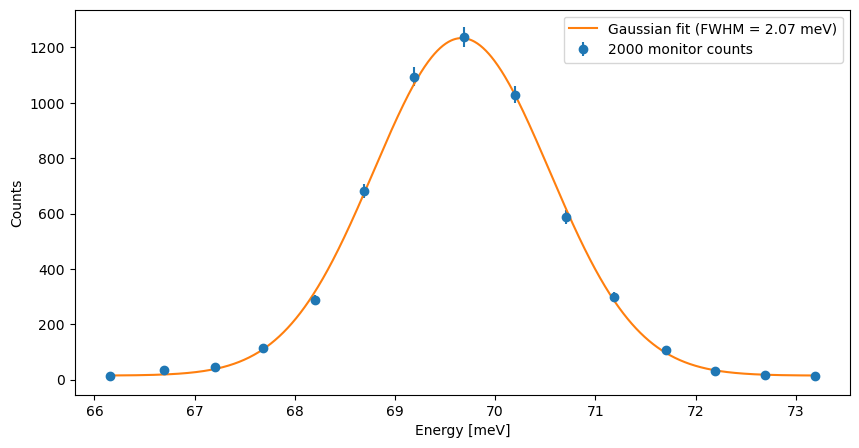

In [4]:
plt.figure(figsize=(10,5))
S = data.loc[Nvana['.7_test']].data
plt.errorbar(S.EI, S.CNTS, yerr=S.dCNTS, fmt='o', label='2000 monitor counts')

gauss = lambda x, A, x0, FWHM, c: A*np.exp(-(x-x0)**2/(2*(FWHM/2.355)**2)) + c

popt, pcov = curve_fit(gauss, S.EI, S.CNTS, sigma=S.dCNTS, p0=[1000, 70, 1, 0])
X = np.linspace(S.EI.min(), S.EI.max(), 1000)
plt.plot(X, gauss(X, *popt), label='Gaussian fit (FWHM = {:.2f} meV)'.format(popt[2]))

plt.legend()
plt.xlabel('Energy [meV]')
plt.ylabel('Counts')

# print of the fit results
print('Gaussian fit results:')
print('x0 = {:.2f} +/- {:.2f} meV (working at Ef = 69.7 meV)'.format(popt[1], np.sqrt(pcov[1,1])))
print('FWHM = {:.2f} +/- {:.2f} meV'.format(popt[2], np.sqrt(pcov[2,2])))

In [54]:
resf = lambda x: np.exp(-(x)**2/(2*(2.07/2.355)**2))

# Empty cells

(-7.0, 7.0)

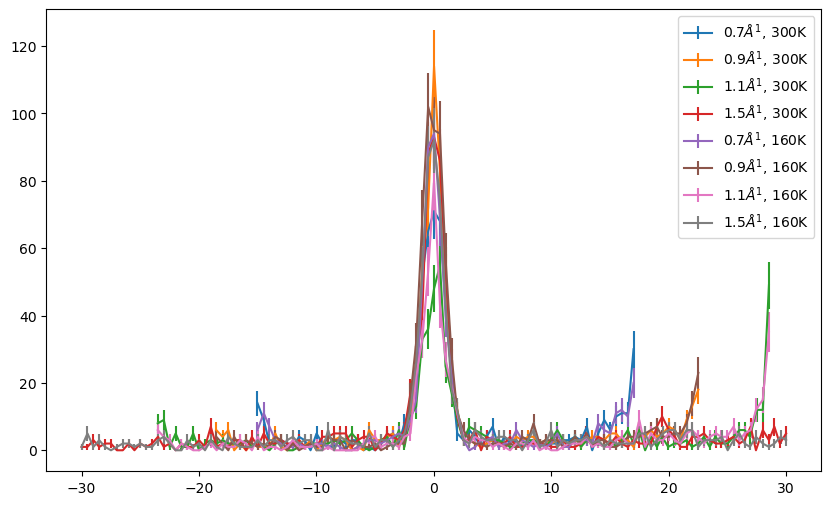

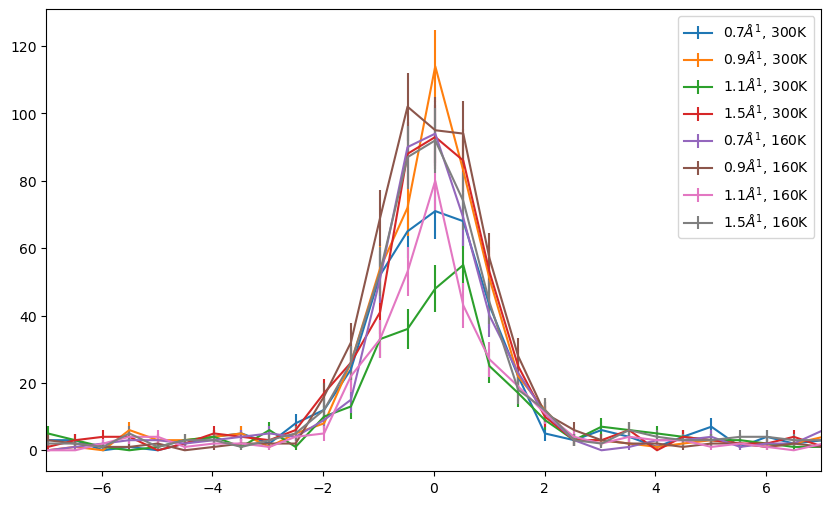

In [15]:
plt.figure(figsize=(10,6))
for T in [300, 160]:
    for q in [.7, .9, 1.1, 1.5]:
        S = data.loc[Nempty[T,q]].data
        plt.errorbar(S.EN, S.CNTS, yerr=S.dCNTS, label='{:.1f}$\AA^1$, {:.0f}K'.format(q, T))
plt.legend()

plt.figure(figsize=(10,6))
for T in [300, 160]:
    for q in [.7, .9, 1.1, 1.5]:
        S = data.loc[Nempty[T,q]].data
        plt.errorbar(S.EN, S.CNTS, yerr=S.dCNTS, label='{:.1f}$\AA^1$, {:.0f}K'.format(q, T))
plt.legend()
plt.xlim(-7,7)

## Comparison of same Q at different Temperatures
As a result, we can work with a single empty cell, summing the two at different T for encrising the statistics.

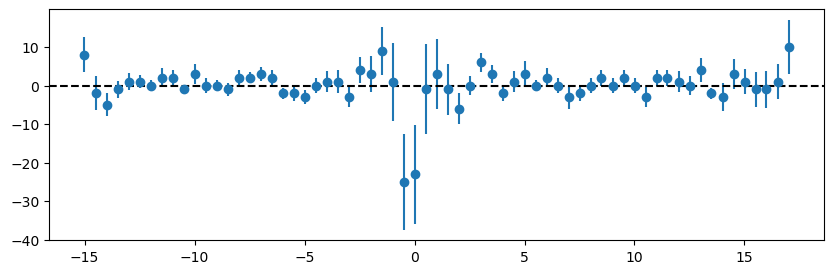

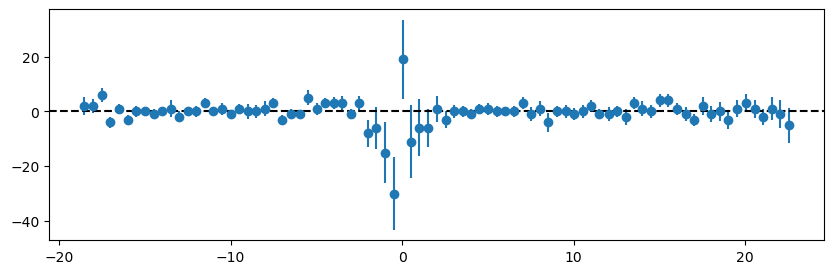

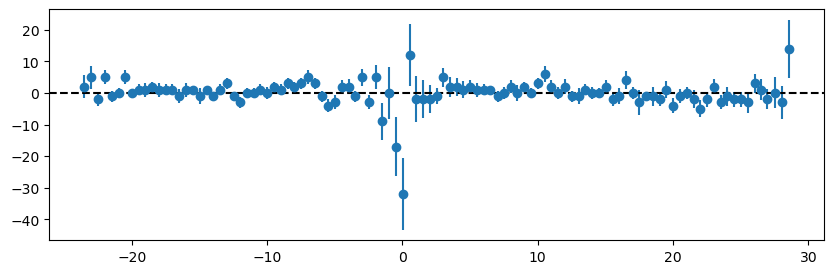

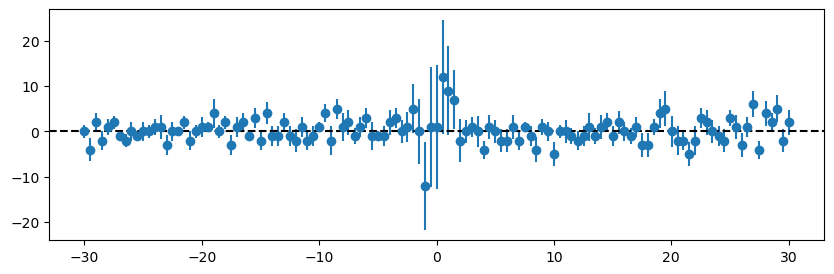

In [14]:
for q in [.7, .9, 1.1, 1.5]:
    plt.figure(figsize=(10,3))
    S1 = data.loc[Nempty[300,q]].data
    S2 = data.loc[Nempty[160,q]].data
    plt.errorbar(S1.EN, S1.CNTS-S2.CNTS, yerr=np.sqrt(S1.dCNTS**2 + S2.dCNTS**2), label='{:.1f}$\AA^1$'.format(q), fmt = 'o')
    plt.axhline(0, color='k', ls='--')

## Averaged empty cells

Text(0, 0.5, 'Counts')

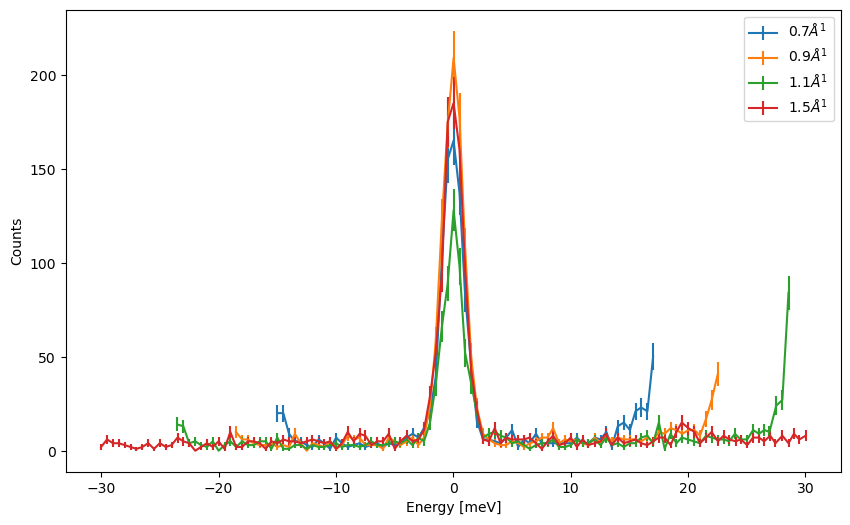

In [18]:
plt.figure(figsize=(10,6))
for q in [.7, .9, 1.1, 1.5]:
    S = data.loc[Nempty[q]].data
    plt.errorbar(S.EN, S.CNTS, yerr=S.dCNTS, label=r'{:.1f}$\AA^1$'.format(q))
plt.legend()
plt.xlabel('Energy [meV]')
plt.ylabel('Counts')

# S(Q) of empty cell


| Alluminium reflection | Q[$\AA^{-1}$]
|-----------------------|--------------
| (111)                 | 2.6877
| (002)                 | 3.1035

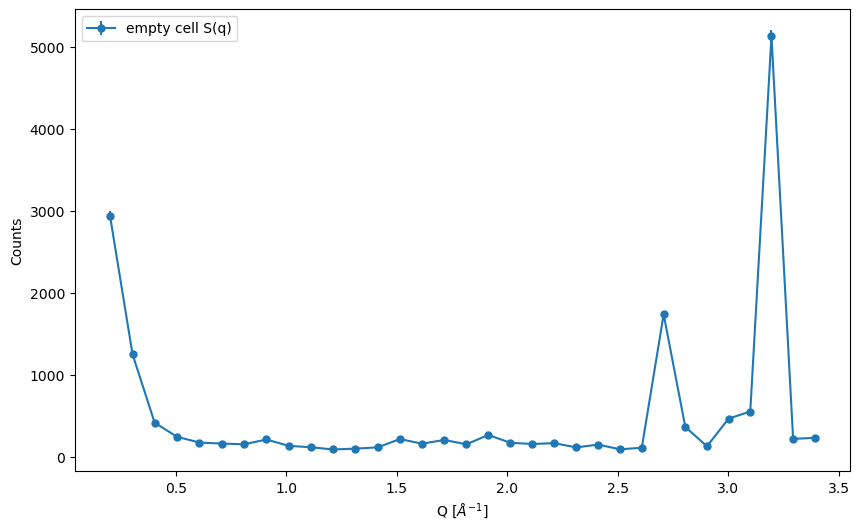

In [8]:
Sq_al = data.loc[NSq_al].data

plt.figure(figsize=(10,6))
plt.errorbar(Sq_al.QM, Sq_al.CNTS, yerr=Sq_al.dCNTS, label='empty cell S(q)', ms = 5, fmt='o-')
plt.xlabel('Q [$\AA^{-1}$]')
plt.ylabel('Counts')
plt.legend()

# S(Q) of glycerol

Text(0, 0.5, 'Counts')

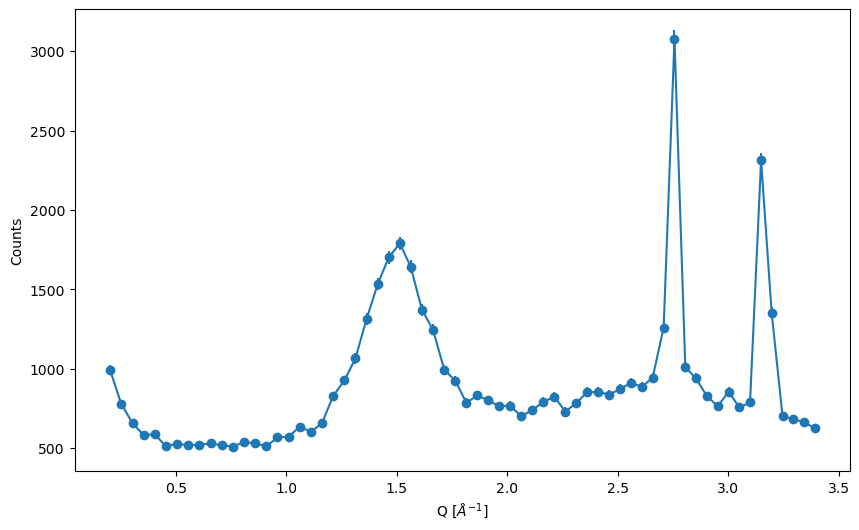

In [34]:
plt.figure(figsize=(10,6))

for T in [300]:
    S = data.loc[NSq_gly[T]].data
    plt.errorbar(S.QM, S.CNTS, yerr=S.dCNTS, label='{:.0f}K'.format(T), fmt='o-')

plt.xlabel('Q [$\AA^{-1}$]')
plt.ylabel('Counts')

# First view of glycerol

## 300K

(0.0, 0.05)

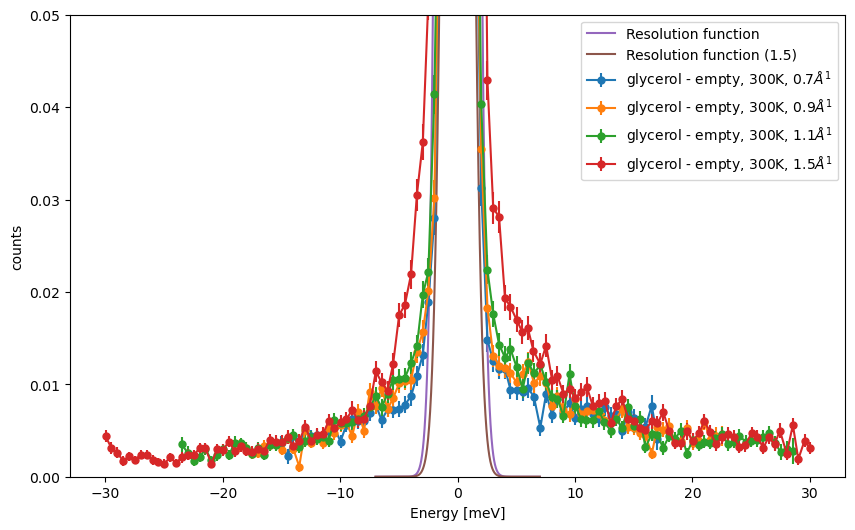

In [77]:
plt.figure(figsize=(10,6))

for q in [.7, .9, 1.1, 1.5]:
    S_gly = data.loc[Ngly[300,q]].data
    S_empty = data.loc[Nempty[q]].data
    CNTS = (S_gly.CNTS/S_gly.M1 - S_empty.CNTS/S_empty.M1)
    dCNTS = np.sqrt((S_gly.dCNTS/S_gly.M1)**2 + (S_empty.dCNTS/S_empty.M1)**2) 
    EN = S_gly.EN
    plt.errorbar(EN, CNTS, yerr=dCNTS, label='glycerol - empty, 300K, {:.1f}$\AA^1$'.format(q), ms = 5, fmt='o-')

X = np.linspace(-7,7,1000)
plt.plot(X, resf(X)*.9, label='Resolution function')
plt.plot(X, resf(X)*.25, label='Resolution function (1.5)')

plt.xlabel('Energy [meV]')
plt.ylabel('counts')
plt.legend()
plt.ylim(0, .05)

## 160K

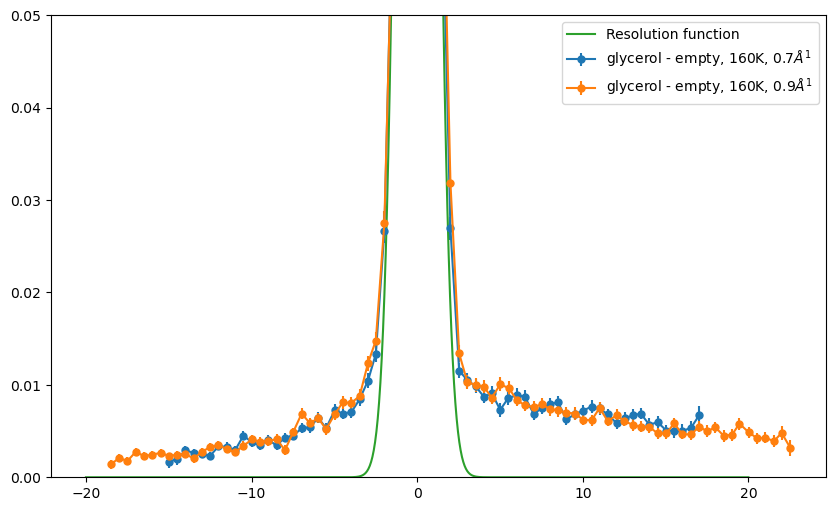

In [76]:
plt.figure(figsize=(10,6))

for q in [.7, .9, 1.1, 1.5]:
    try:
        S_gly = data.loc[Ngly[160,q]].data
        S_empty = data.loc[Nempty[q]].data
        CNTS = (S_gly.CNTS/S_gly.M1 - S_empty.CNTS/S_empty.M1)
        dCNTS = np.sqrt((S_gly.dCNTS/S_gly.M1)**2 + (S_empty.dCNTS/S_empty.M1)**2) 
        EN = S_gly.EN
        plt.errorbar(EN, CNTS, yerr=dCNTS, label='glycerol - empty, 160K, {:.1f}$\AA^1$'.format(q), ms = 5, fmt='o-')
    except:
        pass
X = np.linspace(-20,20,1000)
plt.plot(X, resf(X)*.25, label='Resolution function')
plt.ylim(0, 0.05)
plt.legend()

## T comparison

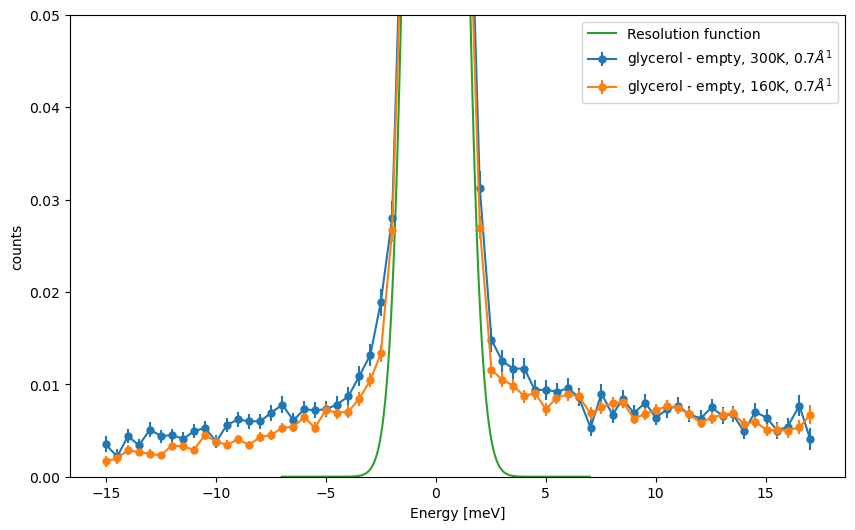

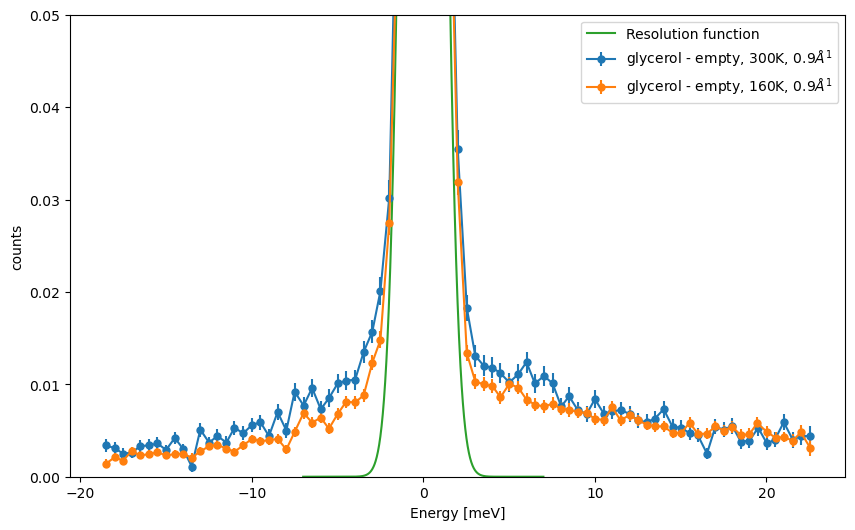

In [80]:
for q in [.7, .9]:
    plt.figure(figsize=(10,6))
    plt.xlabel('Energy [meV]')
    plt.ylabel('counts')
    for T in [300, 160]:
            S_gly = data.loc[Ngly[T,q]].data
            S_empty = data.loc[Nempty[q]].data
            CNTS = (S_gly.CNTS/S_gly.M1 - S_empty.CNTS/S_empty.M1)
            dCNTS = np.sqrt((S_gly.dCNTS/S_gly.M1)**2 + (S_empty.dCNTS/S_empty.M1)**2) 
            EN = S_gly.EN
            plt.errorbar(EN, CNTS, yerr=dCNTS, label='glycerol - empty, {:}K, {:.1f}$\AA^1$'.format(T,q), ms = 5, fmt='o-')
    plt.plot(X, resf(X)*.25, label='Resolution function')
    plt.ylim(0, .05)
    plt.legend()

